**Table of contents**<a id='toc0_'></a>
- [Beyond the Ad: A Holistic Examination of E-commerce Variables Steering Marketing Responses](#toc1_)
  - [1. Introduction](#toc_1)
  - [2. Technical Setup](#toc_2)
    - [2.1. Python](#toc_2_1)
    - [2.2. R](#toc_2_2)
  - [3. Data Collection, Understanding, and Preparation](#toc_3)
    - [3.1. Data Collection](#toc_3_1)
    - [3.2. Data Understanding](#toc_3_2)
    - [3.3. Data Preparation](#toc_3_3)
      - [3.3.1. Unnecessary Features Removal, Missing Value Handling, and New Features Generation](#toc_3_3_1)
    - [3.4. Outlier Treatment](#toc_3_4)
  - [4. Exploratory Data Analysis (EDA)](#toc_4)
    - [4.1. Identifying Influential Factors in Customer Responses](#toc_4_1)
    - [4.2. Enhancing Statistical Significance: Variable Grouping Analysis](#toc_4_2)
    - [4.3. Analyzing Significant Variables for Deep Insights](#toc_4_3)
      - [4.3.1. Spending Habits](#toc_4_3_1)
      - [4.3.2. Influence of Purchase Recency on Campaign Responsiveness](#toc_4_3_2)
    - [4.4. Utilizing Insignificant Variables for Deep Insights](#toc_4_4)
      - [4.4.1. NumWebVisitsMonth Analysis](#toc_4_4_1)
  - [5. Customer Segmentation and Value Analysis](#toc_5)
    - [5.1. RFM Analysis](#toc_5_1)
    - [5.2. Dimensionality Reduction](#toc_5_2)
    - [5.3. Clustering](#toc_5_3)
    - [5.4. Customer Lifetime Value (CLTV) Analysis](#toc_5_4)
  - [6. Future Works](#toc_6)
      - [6.1. Campaign Acceptance (AcceptedCmp1-4): How customer responses to different campaigns correlate with campaign success](#toc_6_1)
      - [6.2. Interaction with the Company (NumCatalogPurchases, Customer_Tenure): How a customer's history with the company influences their response to campaigns](#toc_6_2)
    - [6.3. Feature Selection](#toc_6_3)


# <a id='toc1_1_'></a>[Executive Summary](#toc0_)
An analysis of e-commerce data has been conducted to comprehend customer behavior, particularly their reactions to marketing campaigns. Emphasis has been laid on factors such as spending habits, purchase recency, and website visit frequency. The complexity of the relationship between web visits, total spending, and customer responses has been highlighted. A reliable logistic regression model has confirmed the validity of these findings. 

Some key highlights are:

1. A positive relationship between the frequency of web visits and a customer's response was observed. However, this relationship has been nuanced by the total spending of the customer, emphasizing the necessity to approach customer behavior with a holistic perspective.
2. The diminishing effect of total spending with increased web visits suggests a complex interaction between engagement and expenditure.
3. A model, deemed reliable through metrics such as AIC, PCP, and Tjur's R2, has been used to validate the insights.

From a strategic viewpoint, businesses are advised not only to drive web traffic but also to ensure that these visits lead to meaningful engagements and purchases.



# 1. <a id='#toc_1'></a>[Introduction](#toc_1)

This report provides an investigation into the determinants of customer responses in the e-commerce realm. A detailed dissection of a dataset encompassing various facets of customer behavior has been undertaken. The interplay of numerous influential factors is discussed, leading to insights for refining marketing campaigns.

## 2. <a id='#toc_2'></a>[Technical Setup](#toc_2)

## 2.1. <a id='#toc_2_1'></a>[Python](#toc_2_1)

In [1]:
#data processing
import numpy as np
import pandas as pd
import os
import datetime
import math
import functools
from datetime import datetime
import scipy.stats as stats
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap


import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import sys
sys.path.append(r"D:\Project\rpy2_testing\src")
import my_utils

import warnings
warnings.filterwarnings('ignore')

## 2.2. <a id='#toc_2_2'></a>[R](#toc_2_2)

In [2]:
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.1'  

In [3]:
# import rpy2's package module
from rpy2.robjects.packages import importr
from functools import partial
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

In [4]:
#RUn to install R packages if not installed yet
utils = importr('utils')
base = importr('base')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('peformance', 'tidyr')


# Selectively install what needs to be install.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

R[write to console]: Installing package into 'C:/Users/ramdh/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



In [4]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(dplyr)
library(ggplot2)
library(ggstatsplot)
library(gridExtra)
library(kableExtra)
library(ggthemr)
library(summarytools)

# 3.  <a id='#toc_3'></a>[Data Collection, Understanding, and Preparation](#toc_3)

# 3.1. <a id='#toc_3_1'></a>[Data Collection](#toc_3_1)

In [7]:
df_raw = pd.read_csv('data\marketing_campaign.csv', sep='\t')

## 3.2. <a id='#toc_3_2'></a>[Data Understanding](#toc_3_2)

In [8]:
my_utils.dataframe_info(df_raw)

Column Data Type Unique Count  \
0                    ID     int64         2240   
1            Year_Birth     int64           59   
2             Education    object            5   
3        Marital_Status    object            8   
4                Income   float64         1974   
5               Kidhome     int64            3   
6              Teenhome     int64            3   
7           Dt_Customer    object          663   
8               Recency     int64          100   
9              MntWines     int64          776   
10            MntFruits     int64          158   
11      MntMeatProducts     int64          558   
12      MntFishProducts     int64          182   
13     MntSweetProducts     int64          177   
14         MntGoldProds     int64          213   
15    NumDealsPurchases     int64           15   
16      NumWebPurchases     int64           15   
17  NumCatalogPurchases     int64           14   
18    NumStorePurchases     int64           14   
19    NumWebVisitsMonth     int64           16   
20         AcceptedCmp3     int64            2   
21         AcceptedCmp4     int64            2   
22         AcceptedCmp5     int64            2   
23         AcceptedCmp1     int64            2   
24         AcceptedCmp2     int64            2   
25             Complain     int64            2   
26        Z_CostContact     int64            1   
27            Z_Revenue     int64            1   
28             Response     int64            2   

                                        Unique Sample Missing Values  \
0                      [5524, 2174, 4141, 6182, 5324]              0   
1                      [1957, 1954, 1965, 1984, 1981]              0   
2          [Graduation, PhD, Master, Basic, 2n Cycle]              0   
3        [Single, Together, Married, Divorced, Widow]              0   
4       [58138.0, 46344.0, 71613.0, 26646.0, 58293.0]             24   
5                                           [0, 1, 2]              0   
6                                           [0, 1, 2]              0   
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...              0   
8                                [58, 38, 26, 94, 16]              0   
9                            [635, 11, 426, 173, 520]              0   
10                                 [88, 1, 49, 4, 43]              0   
11                             [546, 6, 127, 20, 118]              0   
12                              [172, 2, 111, 10, 46]              0   
13                                 [88, 1, 21, 3, 27]              0   
14                                 [88, 6, 42, 5, 15]              0   
15                                    [3, 2, 1, 5, 4]              0   
16                                    [8, 1, 2, 5, 6]              0   
17                                   [10, 1, 2, 0, 3]              0   
18                                   [4, 2, 10, 6, 7]              0   
19                                    [7, 5, 4, 6, 8]              0   
20                                             [0, 1]              0   
21                                             [0, 1]              0   
22                                             [0, 1]              0   
23                                             [0, 1]              0   
24                                             [0, 1]              0   
25                                             [0, 1]              0   
26                                                [3]              0   
27                                               [11]              0   
28                                             [1, 0]              0   

    Missing Percentage  
0               0.0000  
1               0.0000  
2               0.0000  
3               0.0000  
4               1.0714  
5               0.0000  
6               0.0000  
7               0.0000  
8               0.0000  
9               0.0000  
10              0.0000  
11              0.0000  
12              0.0000  
13   

This dataset contains 29 variables, consisting of integers (int64), floating points (float64), and objects (object). 

- **ID**: A unique identifier for each customer. This feature may not contribute to a predictive model.

- **Year_Birth**: The birth year of customers, which can be converted to 'Age'.

- **Education** and **Marital_Status**: Categorical features that may require one-hot encoding.

- **Income**: A continuous feature indicating customer's income, with some missing values that need to be filled.

- **Kidhome** and **Teenhome**: Integer variables indicating the number of children in the household.

- **Dt_Customer**: The joining date of customers, which may need to be converted to 'tenure' or similar measure.

- **Recency**: Indicates how recently a customer made a purchase. Further context is needed for proper interpretation.

- **MntX** and **NumXPurchases**: Represent the amount spent on different categories of products and the number of purchases made through different channels, respectively.

- **AcceptedCmpX**: Binary features indicating whether the customer accepted offers in different campaigns.

- **Complain**: A binary feature indicating if the customer made a complaint recently.

- **Z_CostContact** and **Z_Revenue**: Features with no variance, hence can be removed.

- **Response**: The binary target variable indicating whether a customer accepted the latest offer.

Preprocessing will depend on the final model chosen and can involve scaling, encoding, or dropping some features.


## 3.3. <a id='#toc_3_3'></a>[Data Preparation](#toc_3_3)

The quality of the dataset was enhanced by removing non-contributory features (ID, Z_CostContact, Z_Revenue), addressing missing 'Income' values, engineering new features ('Age', 'Customer_Tenure', 'Generation', 'Total_Purchases', 'Total_Spending'), encoding categorical variables, and managing outliers. However, some features were retained as they could signify inherent variability in the population.


**footnotes**:
> The 'Generation' feature is classified as per the definitions given by the Pew Research Centre:
>
> - The Silent Generation: Born 1928-1945 (76-93 years old)
> - Baby Boomers: Born 1946-1964 (57-75 years old)
> - Generation X: Born 1965-1980 (41-56 years old)
> - Millennials: Born 1981-1996 (25-40 years old)
> - Generation Z: Born 1997-2012 (9-24 years old)
> - Generation Alpha: Born 2010-2025 (0-11 years old)

### 3.3.1. <a id='#toc_3_3_1'></a>[Unnecesary Features Removal, Missing Value Handling, and New Features Generation](#toc_3_3_1)

In [9]:
df = df_raw.copy(deep=True)

# 1. Redundant Features Removal
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

# 2. Missing Values Handling
df['Income'] = df['Income'].fillna(df['Income'].median())

# 3. New Features Derivation
# Calculate Age from Year_Birth
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

# Calculate Total Purchase
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Calculate Customer_Tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
last_recorded_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (last_recorded_date - df['Dt_Customer']).dt.days

# Calculate Total Spending
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[product_columns].sum(axis=1)

# Create Living_With feature based on Kidhome and Teenhome
conditions = [
    (df['Kidhome'] == 1) & (df['Teenhome'] == 0),
    (df['Kidhome'] == 0) & (df['Teenhome'] == 1),
    (df['Kidhome'] == 1) & (df['Teenhome'] == 1),
]
choices = ['With_Kids', 'With_Teens', 'With_Kids_and_Teens']
df['Living_With'] = np.select(conditions, choices, default='Alone')

# Create Is_Parent feature
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)

# Define generations
conditions = [
    (df['Age'] >= 76) & (df['Age'] <= 93),
    (df['Age'] >= 57) & (df['Age'] <= 75),
    (df['Age'] >= 41) & (df['Age'] <= 56),
    (df['Age'] >= 25) & (df['Age'] <= 40),
    (df['Age'] >= 9) & (df['Age'] <= 24),
    (df['Age'] >= 0) & (df['Age'] <= 11),
]
choices = ['Silent_Generation', 'Baby_Boomers', 'Generation_X', 'Millennials', 'Generation_Z', 'Generation_Alpha']
df['Generation'] = np.select(conditions, choices, default='Unknown')

df['AcceptedAnyCmp'] = (df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1) > 0).astype(int)

df = df.drop('Dt_Customer', axis=1)

## 3.4. <a id='#toc_3_4'></a>[Outlier Treatment](#toc_3_4)

Outliers were spotted in multiple features. Instead of a complete removal, a selective approach was implemented. Outliers were designated as data points having a significant distance from the nearest data point. This approach was uniformly applied to all variables. After the outlier treatment, 45 data points (about 2.01% of the original data) were removed, leading to improved data quality and potential model performance.


In [10]:
num_df = df.select_dtypes(include=np.number)
nunique_df = pd.DataFrame(data=num_df.apply(pd.Series.nunique), columns=['nunique']).rename_axis('variables')
selection = nunique_df[nunique_df['nunique'] > 5].index

#plotly frame setup
to_plot = num_df[selection]

# number of variables to plot
num_vars = len(to_plot.columns)

# calculate number of rows and columns for the subplot grid
plot_nrows = int(np.ceil(num_vars / 4))

# create subplot titles
subplot_titles = list(to_plot.columns) + [''] * (plot_nrows * 4 - num_vars) 

# create subplots
fig = make_subplots(rows=plot_nrows, cols=4, subplot_titles=tuple(subplot_titles))

# add traces
for i, col_name in enumerate(to_plot.columns):
    row = i // 4 + 1
    col = i % 4 + 1
    fig.add_trace(go.Box(y=to_plot[col_name], name=col_name), row=row, col=col)

fig.update_layout(height=1400, width=1200, showlegend=False, template='plotly_dark', title='Boxplot of Numerical Features')
fig.update_xaxes(visible=False, showticklabels=False)

fig.show()

In [11]:
#count outliers
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1


#outlier dataframe
outlier_count = ((num_df < (Q1-1.5*IQR)) | (num_df > (Q3 + 1.5*IQR))).sum() #outlier count 
outlier_df = pd.DataFrame(outlier_count, columns=['outlier_count']).rename_axis('variable')
outlier_df['percentage'] = outlier_df['outlier_count']/len(num_df)*100 #outlier percentage columns


pd.set_option('display.precision', 2)
outlier_df.sort_values('outlier_count', ascending=False).style.background_gradient(cmap='gist_heat').set_caption('Outlier Count')

In [12]:
#filter multiple conditions
def conjunction(*conditions):
  return functools.reduce(np.logical_and, conditions)

cond1 = df.Age < 90
cond2 = df.Income < 150000
cond3 = df.NumCatalogPurchases < 11
cond4 = df.NumWebVisitsMonth < 13
cond5 = df.NumWebPurchases < 20
cond6 = df.MntSweetProducts < 200
cond7 = df.MntMeatProducts < 1500
cond8 = df.MntGoldProds < 290

df = df[conjunction(cond1, cond2, cond3, cond4, cond5, cond6, cond7, cond8)]
print("Number of data points before outlier removal:", len(df_raw))
print("Number of data points after outlier removal:", len(df))
print("Percentage of data points removed: {:.2f}%".format((len(df_raw) - len(df)) / len(df_raw) * 100))

Number of data points before outlier removal: 2240
Number of data points after outlier removal: 2195
Percentage of data points removed: 2.01%


# 4. <a id='#toc_4'></a>[Exploratory Data Analysis](#toc_4)

## 4.1 <a id='toc_4_1'></a>[Identifying Influential Factors in Customer Responses](#toc_4_1)

This section aims to generate insights into the correlations among the features and their relationships with the response. A correlation matrix and various statistical tests have been applied to establish relationships between each feature and the response.

First, a correlation analysis was conducted. Correlations between numerical features and the response were calculated using Pearson's correlation coefficient. The results are presented in the following table:



In [13]:
# List of numerical columns
numerical_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Purchases', 
                  'Customer_Tenure', 'Total_Spending']

# Initialize an empty dictionary to hold column names, their correlation with 'Response' and p-value
correlation_dict = {}

# Loop through the numerical columns and compute Point Biserial Correlation
for col in numerical_cols:
    correlation, p_value = pointbiserialr(df['Response'], df[col])
    correlation_dict[col] = {'Correlation': correlation, 'P_value': p_value}

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(correlation_dict).T.reset_index().rename(columns={'index':'Variable'})

correlation_df.sort_values('Correlation', ascending=False).style.\
    background_gradient(subset=['Correlation'], cmap='gist_heat').\
        set_caption('Point-Biserial Correlation')

| Variable | Correlation Coefficient | P-value |
|----------|------------------------|---------|
| Income | 0.163569 | 0.000000 |
| NumWebPurchases | 0.156850 | 0.000000 |
| Total_Purchases | 0.150160 | 0.000000 |
| MntGoldProds | 0.145443 | 0.000000 |
| MntSweetProducts | 0.113166 | 0.000000 |
| MntFruits | 0.112847 | 0.000000 |
| MntFishProducts | 0.106046 | 0.000001 |
| NumStorePurchases | 0.031110 | 0.145098 |
| NumDealsPurchases | 0.009872 | 0.643886 |
| NumWebVisitsMonth | 0.007695 | 0.718610 |
| Age | -0.018682 | 0.381668 |
| Kidhome | -0.076050 | 0.000362 |
| Teenhome | -0.152760 | 0.000000 |
| Recency | -0.200908 | 0.000000 |

The figures can be interpreted as follows:

**Possitively correlated with Response**
- The strongest positive correlation has been found with Total_Spending (p-value < 0.05). This statistically significant finding suggests that a higher likelihood of accepting the latest offers is associated with customers who have spent more.
- A similar positive trend is seen with MntMeatProducts and MntWines (both p-values < 0.05), indicating a higher tendency to respond positively to campaigns among customers with higher expenditures on meat products and wines than those who spend high on other product categories.

**Negatively correlated with Response (Inverse Relationship)**

- Conversely, `Recency`, or the recency of a customer's last purchase, shows a negative correlation (p-value < 0.05). This suggests that the more recent a purchase made by a customer, the less likely they are to accept new offers. This could be interpreted as recent buyers still being satisfied with their purchases and possibly not being in the market for more, even when a new offer is presented.

**No significant correlation with Response**
- Interestingly, no significant influence on the decision to accept the latest offers is detected from the number of purchases a customer made with a discount (NumDealsPurchases). This may suggest that discounts are not the primary motivator for these customers or that some improvements need to be made on discount offering strategy.This finding is also statistically significant.

Following the numerical features, categorical features were analyzed using the Chi-square test of independence and Cramér's V test. The Chi-square test evaluates the significance of the observed relationship between the categorical variable and the response. The Cramér’s V test, on the other hand, measures the strength of association between the categorical variable and the response. The Cramer's V take values from 0 (indicating no association) to 1 (indicating perfect association).

In [121]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorial-categorial association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def chi2_and_cramers_v(df, target, variables):
    results = []
    for var in variables:
        contingency_table = pd.crosstab(df[target], df[var])
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        v = cramers_v(df[var], df[target])
        results.append([var, chi2, p, v])

    results_df = pd.DataFrame(results, columns=['Variable', 'Chi-square statistic', 'P-value', 'Cramers_V'])
    results_df = results_df.sort_values(by='Cramers_V', ascending=False)
    return results_df

categorical_cols = ['Education', 'Marital_Status', 'Generation', 'AcceptedCmp1', 'AcceptedCmp2', 
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Living_With', 'Is_Parent']

results_df = chi2_and_cramers_v(df, target='Response', variables=categorical_cols)
results_df

Variable  Chi-square statistic   P-value  Cramers_V
7     AcceptedCmp5                213.03  3.00e-48       0.31
3     AcceptedCmp1                170.52  5.71e-39       0.28
5     AcceptedCmp3                135.74  2.27e-31       0.25
10       Is_Parent                 87.72  7.53e-21       0.20
6     AcceptedCmp4                 70.43  4.77e-17       0.18
9      Living_With                 71.29  2.26e-15       0.18
4     AcceptedCmp2                 60.75  6.48e-15       0.17
1   Marital_Status                 56.38  7.95e-10       0.15
0        Education                 25.12  4.76e-05       0.10
2       Generation                  8.95  3.00e-02       0.05
8         Complain                  0.00  1.00e+00       0.00

The results of the combined analysis using the Chi-square test of independence and Cramér's V statistic are as follows:

- **AcceptedCmp5, AcceptedCmp1, and AcceptedCmp3:** These variables related to the acceptance of offers in previous campaigns showed the strongest associations with the latest campaign response. Their high Chi-square values and almost zero p-values indicated statistically significant relationships, while their Cramér's V values (0.31, 0.28, and 0.25 respectively) suggested a moderate strength of association. This implies that previous acceptances of campaign offers have a significant influence on the likelihood of accepting future campaigns. Thus, focusing on such customers could greatly enhance the success rates of future campaigns.

- **Is_Parent:** With a Cramér's V value of 0.20, this variable displayed a significant yet weaker association with the campaign response. This suggests that being a parent might influence the decision to accept the offer, indicating that campaigns specifically designed for parents could yield higher response rates.

- **AcceptedCmp4, Living_With, and AcceptedCmp2:** Although these variables had weaker associations with the campaign response (Cramér's V = 0.18, 0.18, and 0.17 respectively), they were statistically significant, indicating their potential influence on the outcome. Therefore, these variables should not be disregarded in campaign design.

- **Marital_Status and Education:** These variables exhibited weaker associations with the campaign response (Cramér's V = 0.15 and 0.10 respectively). However, their statistical significance suggests that they might subtly influence customer behavior. Thus, campaign designs that consider different marital statuses and education levels might lead to modest improvements in response rates.

- **Generation:** Despite its weak association with campaign responses (Cramér's V = 0.05), the 'Generation' variable is statistically significant, indicating that generational categories could subtly impact response rates. This also underlines the importance of appropriate data categorization - while the 'Age' variable as a standalone factor didn't demonstrate statistical significance, segmenting it into 'Generation' has revealed potential behavioral insights.

- **Complain:** There was no significant association between this variable and the campaign response (Cramér's V = 0.00). This suggests that a customer's complaint history does not appear to significantly impact their decision to accept the offer in the latest campaign. As a result, it may not be necessary to prioritize this variable in the context of campaign design.

## 4.2. <a id='toc_4_2'></a>[Enhancing Statistical Significance: Variable Grouping Analysis](#toc_4_2)

The successful grouping of the 'Age' variable, which contributed to significant statistical results, serves as the inspiration to apply similar treatment to other numerical variables. Particularly, the variables that did not previously demonstrate statistical significance, such as 'NumStorePurchases', 'NumDealsPurchases', and 'NumWebVisitsMonth', will be targeted. Furthermore, other numerical variables with sufficient unique values will also be grouped.

Discretization by quartiles has been selected as the chosen grouping technique due to its robustness in handling outliers and skewness and its ability to transform numerical data into categorical while preserving the distribution properties. The optimal quartile value for grouping was decided based on the one that provided the most significant Chi-square statistic and Cramér's V value. The newly grouped variables might be useful for the later modeling stage.

In [15]:
def dicretize_stats_test(df, variable_name, target_name, min_quartiles=2, max_quartiles=21):
    """Perform a chi-square test and calculate Cramér's V for a variable discretized into different numbers of quartiles."""
    
    # Initialize an empty list to store the results
    test_results = []

    # Loop through different numbers of quartiles
    for quartiles in range(min_quartiles, max_quartiles): 
        # Discretize the variable into quartiles
        variable_quartiles = pd.qcut(df[variable_name], quartiles, labels=False, duplicates='drop')

        # Create a contingency table
        contingency_table = pd.crosstab(df[target_name], variable_quartiles)

        # Perform the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Compute Cramer's V
        v = cramers_v(df[target_name], variable_quartiles)

        # Append the results to the list
        test_results.append([f'{variable_name}_{quartiles}', chi2, p, v])

    # Convert the list to a DataFrame
    test_results_df = pd.DataFrame(test_results, columns=['Variable', 'Chi-square statistic', 'P-value', 'Cramers_V'])

    # Sort the DataFrame by the chi-square statistic in descending order
    test_results_df = test_results_df.sort_values('Chi-square statistic', ascending=False)

    return test_results_df

In [17]:
dicretize_stats_test(df, 'NumStorePurchases', 'Response', min_quartiles=2, max_quartiles=10)

Variable  Chi-square statistic   P-value  Cramers_V
7  NumStorePurchases_9                 27.46  1.19e-04       0.10
4  NumStorePurchases_6                 26.28  7.87e-05       0.10
3  NumStorePurchases_5                 24.83  5.45e-05       0.10
6  NumStorePurchases_8                 24.74  3.82e-04       0.09
5  NumStorePurchases_7                 23.95  2.22e-04       0.09
1  NumStorePurchases_3                 21.66  1.98e-05       0.09
2  NumStorePurchases_4                 18.14  4.12e-04       0.08
0  NumStorePurchases_2                 10.08  1.50e-03       0.06

The `NumStorePurchases` variable is best segmented into 6 categories (discretize by 6 quartiles). Here's why:

- The statistical significance (p-value: 7.87e-05) is high, showing a meaningful relationship with campaign responses.
- The association strength (Cramér's V: 0.10) is similar across different segmentations.
- A 6-category split balances useful insights with easy comprehension.


In [18]:
dicretize_stats_test(df, 'NumWebVisitsMonth', 'Response', min_quartiles=2, max_quartiles=9)

Variable  Chi-square statistic   P-value  Cramers_V
5  NumWebVisitsMonth_7                 45.49  3.74e-08       0.13
6  NumWebVisitsMonth_8                 45.49  3.74e-08       0.13
4  NumWebVisitsMonth_6                 42.01  5.86e-08       0.13
3  NumWebVisitsMonth_5                 26.50  2.51e-05       0.10
2  NumWebVisitsMonth_4                 19.46  2.19e-04       0.09
1  NumWebVisitsMonth_3                 19.39  6.15e-05       0.09
0  NumWebVisitsMonth_2                  1.27  2.59e-01       0.01

For `NumWebVisitsMonth`, segmenting into 7 categories proves to be an effective choice. Here's the rationale:

- High statistical significance (p-value: 3.74e-08) indicates a robust relationship with campaign responses.
- The strength of association (Cramér's V: 0.13) is consistently strong across different segmentations.
- A 7-category split balances comprehensive insights with ease of understanding for non-technical stakeholders.


In [19]:
dicretize_stats_test(df, 'NumDealsPurchases', 'Response', min_quartiles=2, max_quartiles=9)

Variable  Chi-square statistic   P-value  Cramers_V
5  NumDealsPurchases_7                 19.15  7.33e-04       0.08
6  NumDealsPurchases_8                 19.15  7.33e-04       0.08
4  NumDealsPurchases_6                 19.03  2.70e-04       0.09
2  NumDealsPurchases_4                 16.89  7.46e-04       0.08
3  NumDealsPurchases_5                 16.89  7.46e-04       0.08
1  NumDealsPurchases_3                 14.56  6.90e-04       0.08
0  NumDealsPurchases_2                  0.09  7.64e-01       0.00

In the case of `NumDealsPurchases`, the analysis suggests a relatively weak relationship with campaign responses:

- Across all levels of segmentation, the association (Cramér's V) stays consistently around 0.08, indicating a weak link with the campaign's outcome.
- The p-values are significant, suggesting a statistically noteworthy relationship. However, their values are larger than those of previously discussed variables, hinting at a weaker effect.
- Segmenting `NumDealsPurchases` into 6 categories seems to be the optimal choice, as it strikes a balance between insights and interpretability while preserving a reasonable level of statistical significance (p-value: 2.70e-04).

Although the relationship is weak, it should not be disregarded. The frequency of deal purchases may offer a minor yet valuable hint on customer behavior and preferences that can guide the design of future campaigns.

In [132]:
dicretize_stats_test(df, 'NumStorePurchases', 'Total_Spending', min_quartiles=2, max_quartiles=9)

Variable  Chi-square statistic    P-value  Cramers_V
6  NumStorePurchases_8               9893.46  4.23e-175       0.53
5  NumStorePurchases_7               8357.89  1.29e-155       0.54
4  NumStorePurchases_6               8265.86  4.74e-148       0.53
3  NumStorePurchases_5               6643.77  1.86e-121       0.53
2  NumStorePurchases_4               5116.14  7.26e-103       0.55
1  NumStorePurchases_3               3677.41   1.64e-93       0.61
0  NumStorePurchases_2               1947.03   1.36e-58       0.64

Then, the same experiment was applied on other variables to decide which quartile value is optimum to use for grouping the values. These includes variables that already shown statistical significance relationship with Response. The reason is that these newly group values might be useful for later modeling stage

In [16]:
df['Recency_Grp'] = pd.qcut(df['Recency'], q=5, labels=None)
df['Total_Spending_Grp'] = pd.qcut(df['Total_Spending'], q=6, labels=None)
df['MntMeatProducts_Grp'] = pd.qcut(df['MntMeatProducts'], q=5, labels=None)
df['MntWines_Grp'] = pd.qcut(df['MntWines'], q=5, labels=None)
df['Customer_Tenure_Grp'] = pd.qcut(df['Customer_Tenure'], q=6, labels=None)
df['Income_Grp'] = pd.qcut(df['Income'], q=8, labels=None)

df['NumStorePurchases_Grp'] = pd.qcut(df['NumStorePurchases'], q=6, labels=None)
df['NumDealsPurchases_Grp'] = pd.qcut(df['NumDealsPurchases'], q=4, labels=None)
df['NumWebVisitsMonth_Grp'] = pd.qcut(df['NumWebVisitsMonth'], q=7, labels=None)


categorical_cols = ['Education', 'Marital_Status', 'Generation', 'AcceptedCmp1', 'AcceptedCmp2', 
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Living_With', 'Is_Parent', 
                    'Recency_Grp', 'Total_Spending_Grp', 'NumStorePurchases_Grp', 'NumDealsPurchases_Grp', 'NumWebVisitsMonth_Grp',
                    'Income_Grp', 'Customer_Tenure_Grp', 'MntMeatProducts_Grp', 'MntWines_Grp']

# Initialize an empty list to hold column names, their test statistic, p-value and degrees of freedom
chi2_results = []

# Loop through the categorical columns and perform Chi-Square test
for col in categorical_cols:
    contingency_table = pd.crosstab(df['Response'], df[col])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    chi2_results.append([col, chi2, p])

# # Convert the list to a DataFrame
# chi2_df = pd.DataFrame(chi2_results, columns=['Variable', 'Chi-square statistic', 'P-value'])

# chi2_df.sort_values('Chi-square statistic', ascending=False)

chi2_and_cramers_v(df, target='Response', variables=categorical_cols)

Variable  Chi-square statistic   P-value  Cramers_V
7            AcceptedCmp5                213.03  3.00e-48       0.31
3            AcceptedCmp1                170.52  5.71e-39       0.28
12     Total_Spending_Grp                153.91  1.97e-31       0.26
5            AcceptedCmp3                135.74  2.27e-31       0.25
16             Income_Grp                129.12  9.58e-25       0.24
11            Recency_Grp                107.35  2.67e-22       0.22
18    MntMeatProducts_Grp                102.62  2.72e-21       0.21
17    Customer_Tenure_Grp                100.86  3.48e-20       0.21
19           MntWines_Grp                 92.15  4.61e-19       0.20
10              Is_Parent                 87.72  7.53e-21       0.20
6            AcceptedCmp4                 70.43  4.77e-17       0.18
9             Living_With                 71.29  2.26e-15       0.18
4            AcceptedCmp2                 60.75  6.48e-15       0.17
1          Marital_Status                 56.38  7.95e-10       0.15
15  NumWebVisitsMonth_Grp                 45.49  3.74e-08       0.13
13  NumStorePurchases_Grp                 26.28  7.87e-05       0.10
0               Education                 25.12  4.76e-05       0.10
14  NumDealsPurchases_Grp                 16.89  7.46e-04       0.08
2              Generation                  8.95  3.00e-02       0.05
8                Complain                  0.00  1.00e+00       0.00

In [84]:
#save to csv
# df.to_csv('marketing_campaign_clean.csv', index=False)

## 4.3. <a id='toc_4_3'></a>[Analyzing Significant Variables for Deep Insights](#toc_4_3)

In [17]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import ticker as plticker
from matplotlib import ticker
import seaborn as sns
import matplotlib as mpl



def discretize(v, v_intervals, use_quartiles=False, use_continuous_bins=False):
    if isinstance(v, (pd.core.series.Series, np.ndarray)) and isinstance(v_intervals, (list, np.ndarray)) and len(np.unique(v)) != len(v_intervals):
        raise Exception("length of interval must match unique items in array")

    if isinstance(v, (str)) and isinstance(v_intervals, (list, np.ndarray)):
        #name of variable instead of array and list of intervals used
        if isinstance(v_intervals, list): v_intervals = np.array(v_intervals)
        return v, v_intervals

    if (np.isin(v.dtype, [int, float, 'int8', 'int16', 'int32', 'float16', 'float32'])) and (isinstance(v_intervals, (int))) and (len(np.unique(v)) >= v_intervals) and (max(v) > min(v)):
        #v is discretizable, otherwise assumed to be already discretized
        if use_continuous_bins:
            if use_quartiles:
                v, bins = pd.qcut(v, v_intervals, duplicates='drop', retbins=True, labels=True, precision=2)
            else:
                v, bins = pd.cut(v, v_intervals, duplicates='drop', retbins=True, labels=True, precision=2)
        else:
            if use_quartiles:
                v = pd.qcut(v, v_intervals, duplicates='drop', precision=2)
            else:
                v = pd.cut(v, v_intervals, duplicates='drop', precision=2)

    if np.isin(v.dtype, [object, 'category']):
        if not isinstance(v, (pd.core.series.Series)):
            v = pd.Series(v)
        bins = np.sort(np.unique(v)).astype(str)
        v = v.astype(str)
        bin_dict = {bins[i]:i for i in range(len(bins))}
        v = v.replace(bin_dict)
    else:
        bins = np.unique(v)

    if isinstance(v_intervals, (list, np.ndarray)) and len(bins) == len(v_intervals):
        bins = v_intervals

    return v, bins

def plot_prob_progression(x, y, x_intervals=7, use_quartiles=False,\
                          xlabel=None, ylabel=None, title=None, text=None, model=None, X_df=None, x_col=None,\
                         mean_line=False, figsize=(12,6), x_margin=0.01, color='Reds'):
    x = x.astype(int)
    y = y.astype(int)
    if isinstance(x, list): x = np.array(x)
    if isinstance(y, list): y = np.array(y)
    if (not isinstance(x, (str, pd.core.series.Series, np.ndarray))) or (not isinstance(y, (str, pd.core.series.Series, np.ndarray))):
        raise Exception("x and y must be either lists, pandas series or numpy arrays. x can be string when dataset is provided seperately")
    if (isinstance(x, (pd.core.series.Series, np.ndarray)) and (len(x.shape) != 1)) or ((isinstance(y, (pd.core.series.Series, np.ndarray))) and (len(y.shape) != 1)):
        raise Exception("x and y must have a single dimension")
    if (isinstance(x_intervals, (int)) and (x_intervals < 2)) or (isinstance(x_intervals, (list, np.ndarray)) and (len(x_intervals) < 2)):
        raise Exception("there must be at least two intervals to plot")
    if not np.isin(y.dtype, [int, float, 'int8', 'int16', 'int32', 'float16', 'float32']):
        raise Exception("y dimension must be a list, pandas series or numpy array of integers or floats")
    if max(y) == min(y):
        raise Exception("y dimension must have at least two values")
    elif len(np.unique(y)) == 2 and ((max(y) != 1) or (min(y) != 0)):
        raise Exception("y dimension if has two values must have a max of exactly 1 and min of exactly zero")
    elif len(np.unique(y)) > 2 and ((max(y) <= 1) or (min(y) >= 0)):
        raise Exception("y dimension if has more than two values must have range between between 0-1")
    x_use_continuous_bins = (model is not None) and (isinstance(x_intervals, (list, np.ndarray)))
    x, x_bins = discretize(x, x_intervals, use_quartiles, x_use_continuous_bins)
    x_range = [*range(len(x_bins))]
    plot_df = pd.DataFrame({'x':x_range})
    if (model is not None) and (X_df is not None) and (x_col is not None):
        preds = model.predict(X_df).squeeze()
        if len(np.unique(preds)) <= 2:
            preds = model.predict_proba(X_df)[:,1]
        x_, _ = discretize(X_df[x_col], x_intervals, use_quartiles, x_use_continuous_bins)
        xy_df = pd.DataFrame({'x':x_, 'y':preds})
    else:
        xy_df = pd.DataFrame({'x':x,'y':y})
    probs_df = xy_df.groupby(['x']).mean().reset_index()
    probs_df = pd.merge(plot_df, probs_df, how='left', on='x').fillna(0)

    x_bin_cnt = len(x_bins)
    l_width = 0.933
    r_width = 0.05
    w, h = figsize
    wp = (w-l_width-r_width)/9.27356902357
    xh_margin = ((wp-(x_margin*2))/(x_bin_cnt*2))+x_margin
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=figsize,\
                                   gridspec_kw={'height_ratios': [3, 1]})
    if title is not None:
        fig.suptitle(title, fontsize=21)
        ax0.text(0.61, 0.85, text,
                 horizontalalignment='left', verticalalignment='top', transform=ax0.transAxes, fontsize=9, fontstyle='italic')
        plt.subplots_adjust(top = 0.92, bottom=0.01, hspace=0.001, wspace=0.001)
    else:
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.001, wspace=0.001)

    ax0.minorticks_on()
    # Disable grid for ax0
    ax0.grid(False)
    cmap = mpl.colormaps[color]
    num_segments = len(probs_df['y']) - 1

    for i in range(num_segments):
        segment = probs_df.iloc[i:i+2]
        color = cmap(i / num_segments)
        sns.lineplot(data=segment, x='x', y='y', marker='o', color=color, ax=ax0)

    # sns.lineplot(data=probs_df, x='x', y='y', marker='o', ax=ax0)
    ax0.set_ylabel('Probability', fontsize=15)
    ax0.set_xlabel('')

    if mean_line:
        ax0.axhline(y=xy_df.y.mean(), c='#E9EAE5', alpha=0.6, linestyle='dotted', label="mean")
        ax0.legend()

    
    colors = [cmap(i) for i in np.linspace(0, 1, len(x_bins))]

    # Disable grid for ax1
    ax1.grid(False)

    hist = sns.histplot(xy_df, x="x", stat='probability', bins=np.arange(x_bin_cnt+1)-0.5, ax=ax1)
    # color the bars using the color map
    for patch, color in zip(hist.patches, colors):
        patch.set_facecolor(color) # color depends on the index of the bar
    ax1.set_ylabel('Observations', fontsize=15)
    ax1.set_xlabel(xlabel, fontsize=15)
    ax1.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
    ax1.set_xticklabels(['']+['(' + str(round(float(i.split(',')[0][1:]))) + ', ' + str(round(float(i.split(',')[1][:-1]))) + ']' for i in x_bins])
    ax1.margins(x=x_margin)
    plt.show()

plt.style.use('ggplot')
sns.set_style({'axes.grid' : False})

plt.rcParams.update({
    'axes.facecolor': '#00010D',
    'figure.facecolor': '#00010D',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': 1.2,
    'axes.titlecolor': 'white',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.edgecolor': 'white',
    'legend.frameon': False,
    'legend.fontsize': 10,
    'legend.handlelength': 1.2,
    'legend.handleheight': 0.5
})

### 4.3.1. <a id='toc_4_3_1'></a>[Spending Habits](#toc_4_3_1)

Through a detailed examination of customers' total spending and their expenditures on specific product categories, we can discern important patterns that may guide future marketing strategies. The accompanying plot visually represents these trends, with each spending group's response rate plotted on the vertical axis against various spending brackets on the horizontal axis. 

In [120]:
#plot_prob_progression is a function that plots the probability of positive responses (e.g., campaign success) across different categories or ranges of a variable. 
#This function will help to visualize how the probability of campaign success changes with the variable of interest.
plot_prob_progression(df['Total_Spending'],
                      df['Response'],
                      x_intervals=6, use_quartiles=True,  mean_line=True,
                      title='Probability of Response by Total_Spending',
                      color='Reds_r')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Below, we delve into these findings:

- **Total Spending:** Higher total spending corresponds to a higher response rate to marketing campaigns. Notably, customers spending above the average ($1253-$2525) show a robust response rate of 35%. This group could be targeted with exclusive promotions or loyalty programs to reinforce their engagement. For lower spenders (below $1253), we should experiment with our campaign strategies to better cater to their needs and interests.

- **Meat Products:** A similar trend is noticed in meat product spending. Customers spending over $288.6 on meat products respond at a rate of 28%. We could strengthen our meat product-oriented campaigns to appeal to this high-spending segment. For those spending less, consider diversifying our meat product offerings or creating budget-friendly meat bundles to potentially stimulate spending.

- **Wines:** Customers spending over $641.33 on wines exhibit the highest response rate at 33% across all categories. This group could benefit from campaigns that highlight our premium wine selections or exclusive wine club memberships. For lower wine spenders, introducing more affordable wines or special deals on bulk purchases might enhance their engagement with our campaigns.

These findings highlight the importance of adapting our marketing strategies to reflect the different spending levels and preferences of our customer segments. In the next section, we will analyze our customers' purchasing habits across various channels.

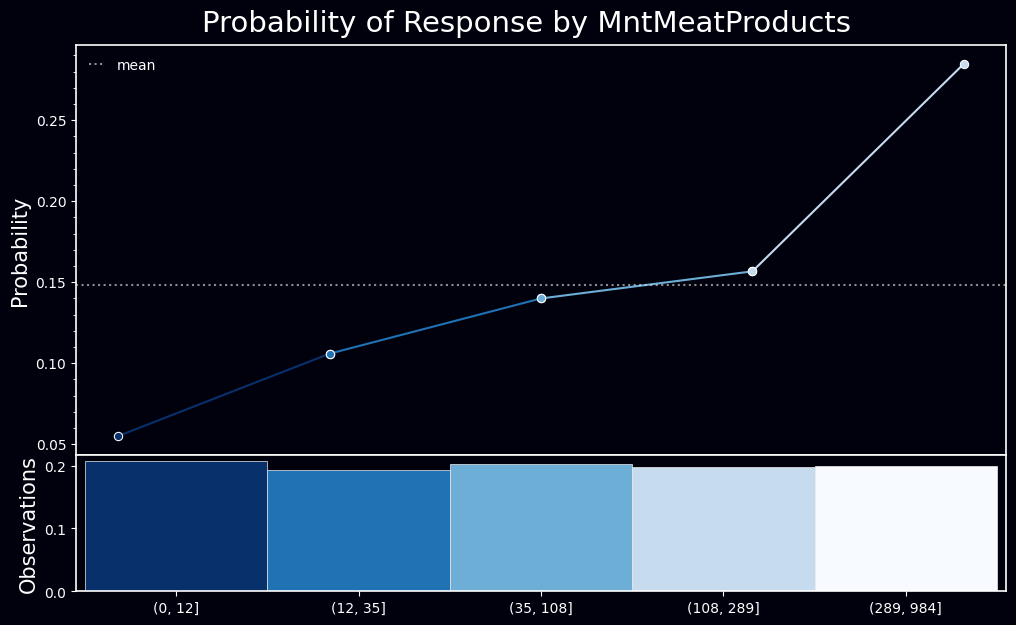

In [23]:
plot_prob_progression(df['MntMeatProducts'],
                      df['Response'],
                      x_intervals=5, use_quartiles=True,  mean_line=True,
                      title='Probability of Response by MntMeatProducts',
                      color='Blues_r')

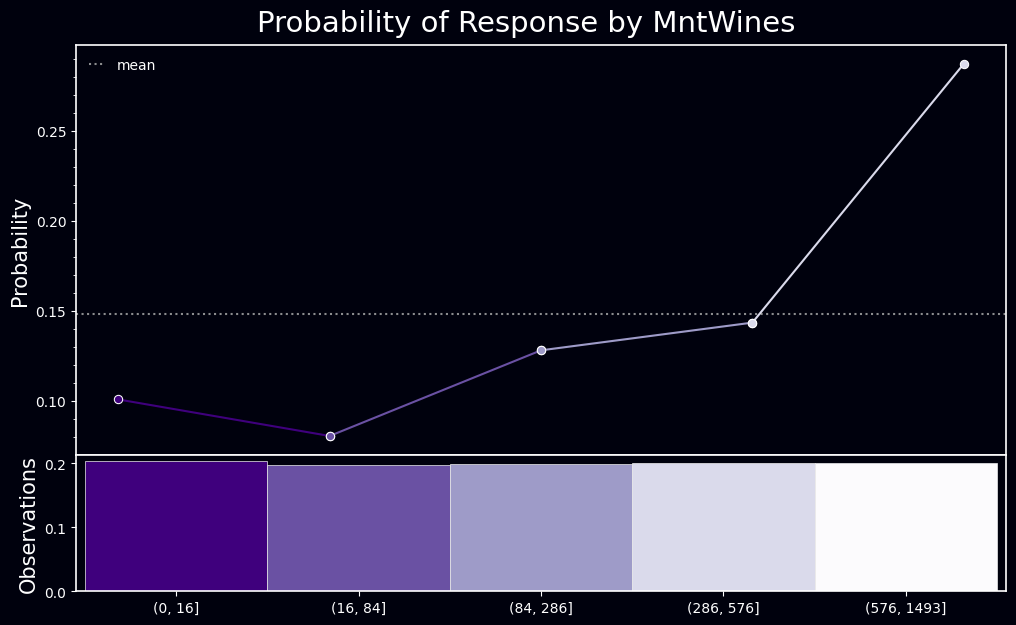

In [24]:
plot_prob_progression(df['MntWines'],
                      df['Response'],
                      x_intervals=5, use_quartiles=True,  mean_line=True,
                      title='Probability of Response by MntWines',
                      color='Purples_r')

### 4.3.2. <a id='toc_4_3_2'></a>[Influence of Purchase Recency on Campaign Responsiveness](#toc_4_3_2)

In this section, we turn our focus towards the 'Recency' of customers' last purchase and how this variable, in conjunction with spending habits, influences campaign responsiveness. The plot and data reveal interesting insights into how the time elapsed since the last purchase and expenditure levels shape a customer's likelihood of responding to marketing campaigns.

Contour plot will be used throughout this section to help us understand the interaction among three variables. 

---

**Understanding Contour Plot**:
> The contour plot makes use of colors to help us understand the response rate's variation across different levels of Recency and Spending. In these plots, we'll employ the 'viridis' color map, a perceptually uniform representation of data, which moves from purple to yellow.
> 
> The purple region of the plot corresponds to a lower response rate, transitioning to green, and ultimately yellow, which signifies a higher response rate. This progression of color effectively communicates how the response rate to marketing campaigns varies as we traverse from regions representing high recency and low spending (illustrated in purple) towards areas reflecting low recency and high spending (highlighted in yellow).
> 
> As we explore the plots in the subsequent sections, we will observe this color-coded trend consistently across different segments, such as Total Spending, Wines, and Meat Products. These plots will enable us to visually map spending and recency against the response rate to our marketing campaigns.

--- 

In [25]:
def plot_prob_contour_map(x, y, z, x_intervals=7, y_intervals=7, use_quartiles=False, plot_type='contour',\
                          xlabel=None, ylabel=None, title=None, model=None, X_df=None, x_col=None, y_col=None,\
                          diff_to_mean=False, annotate=False):
    x = x.astype(int)
    y = y.astype(int)
    z = z.astype(int)
    if isinstance(x, list): x = np.array(x)
    if isinstance(y, list): y = np.array(y)
    if isinstance(z, list): z = np.array(z)
    if (not isinstance(x, (str, pd.core.series.Series, np.ndarray))) or (not isinstance(y, (str, pd.core.series.Series, np.ndarray))) or (not isinstance(z, (pd.core.series.Series, np.ndarray))):
        raise Exception("x, y and z must be either lists, pandas series or numpy arrays. x and y can be strings when dataset is provided seperately")
    if (isinstance(x, (pd.core.series.Series, np.ndarray)) and (len(x.shape) != 1)) or ((isinstance(y, (pd.core.series.Series, np.ndarray))) and (len(y.shape) != 1)) or (len(z.shape) != 1):
        raise Exception("x, y and z must have a single dimension")
    if (isinstance(x_intervals, (int)) and (x_intervals < 2)) or (isinstance(x_intervals, (list, np.ndarray)) and (len(x_intervals) < 2)) or (isinstance(y_intervals, (int)) and (y_intervals < 2)) or (isinstance(y_intervals, (list, np.ndarray)) and (len(y_intervals) < 2)):
        raise Exception("there must be at least two intervals to contour")
    if not np.isin(z.dtype, [int, float, 'int8', 'int16', 'int32', 'float16', 'float32']):
        raise Exception("z dimension must be a list, pandas series or numpy array of integers or floats")
    if max(z) == min(z):
        raise Exception("z dimension must have at least two values")
    elif len(np.unique(z)) == 2 and ((max(z) != 1) or (min(z) != 0)):
        raise Exception("z dimension if has two values must have a max of exactly 1 and min of exactly zero")
    elif len(np.unique(z)) > 2 and ((max(z) <= 1) or (min(z) >= 0)):
        raise Exception("z dimension if has more than two values must have range between between 0-1")
    x_use_continuous_bins = (model is not None) and (isinstance(x_intervals, (list, np.ndarray)))
    y_use_continuous_bins = (model is not None) and (isinstance(y_intervals, (list, np.ndarray)))
    x, x_bins = discretize(x, x_intervals, use_quartiles, x_use_continuous_bins)
    y, y_bins = discretize(y, y_intervals, use_quartiles, y_use_continuous_bins)
    x_range = [*range(len(x_bins))]
    #if isinstance(y_intervals, (int)):
    y_range = [*range(len(y_bins))]
    #else:
    #y_range = y_intervals
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
    plot_df = pd.DataFrame(positions.T, columns=['x', 'y'])
    
    if (model is not None) and (X_df is not None) and (x_col is not None) and (y_col is not None):
        preds = model.predict(X_df).squeeze()
        if len(np.unique(preds)) <= 2:
            preds = model.predict_proba(X_df)[:,1]
        x_, _ = discretize(X_df[x_col], x_intervals, use_quartiles, x_use_continuous_bins)
        y_, _ = discretize(X_df[y_col], y_intervals, use_quartiles, y_use_continuous_bins)
        xyz_df = pd.DataFrame({'x':x_, 'y':y_, 'z':preds})
    else:
        xyz_df = pd.DataFrame({'x':x,'y':y,'z':z})
    probs_df = xyz_df.groupby(['x','y']).mean().reset_index()        
    probs_df = pd.merge(plot_df, probs_df, how='left', on=['x','y']).fillna(0)
    if diff_to_mean:
        expected_value = xyz_df.z.mean()
        probs_df['z'] = probs_df['z'] - expected_value
        cmap = plt.cm.RdYlBu
    else:
        cmap = plt.cm.viridis
    grid_probs = np.reshape(probs_df.z.to_numpy(), x_grid.shape)

    x_bin_cnt = len(x_bins)
    y_bin_cnt = len(y_bins)
    fig, (ax_top, ax_bottom) = plt.subplots(2, 2, figsize=(12,9),\
                                   gridspec_kw={'height_ratios': [1, 7], 'width_ratios': [6, 1]})
    if title is not None:
        fig.suptitle(title, fontsize=21)
        plt.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.001, wspace=0.001)
    else:
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.001, wspace=0.001)

    sns.set_style(None)
    # sns.set_style({'axes.facecolor':'black', 'grid.color': 'white'})
    sns.histplot(xyz_df, x='x', stat='probability', bins=np.arange(x_bin_cnt+1)-0.5, color='dimgray', ax=ax_top[0])
    ax_top[0].set_xticks([])
    ax_top[0].set_yticks([])
    ax_top[0].set_xlabel('')
    ax_top[0].set_ylabel('')
    ax_top[1].set_visible(False)

    if plot_type == 'contour':
        ax_bottom[0].contour(
            x_grid,
            y_grid,
            grid_probs,
            colors=('w',)
        )
        mappable = ax_bottom[0].contourf(
            x_grid,
            y_grid,
            grid_probs,
            cmap=cmap
        ) 
    else:
        mappable = ax_bottom[0].imshow(grid_probs, cmap=plt.cm.viridis,\
                                      interpolation='nearest', aspect='auto')
        if annotate:
            for i in range(y_bin_cnt):
                for j in range(x_bin_cnt):
                    text = ax_bottom[0].text(j, i, "{:.1%}".format(grid_probs[i, j]), fontsize=16,
                                             ha="center", va="center", color="w")
            ax_bottom[0].grid(False)
            
    ax_bottom[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
    ax_bottom[0].set_xticklabels([''] + list(x_bins))
    ax_bottom[0].yaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
    ax_bottom[0].set_yticklabels([''] + list(y_bins))
    #ax_bottom[0].margins(x=0.04, y=0.04)

    if xlabel is not None:
        ax_bottom[0].set_xlabel(xlabel, fontsize=15)
        
    if ylabel is not None:
        ax_bottom[0].set_ylabel(ylabel, fontsize=15)

    cbar = plt.colorbar(mappable, ax=ax_bottom[1])
    cbar.ax.set_ylabel('Probability', fontsize=13)
    cbar.ax.tick_params(labelsize=11)

    sns.histplot(xyz_df, x='x', stat='probability', bins=np.arange(x_bin_cnt+1)-0.5, color='dimgray', ax=ax_top[0])
    ax_bottom[1].set_xticks([])
    ax_bottom[1].set_yticks([])
    ax_bottom[1].set_xlabel('')
    ax_bottom[1].set_ylabel('')
    sns.set_style(None)

    plt.show()

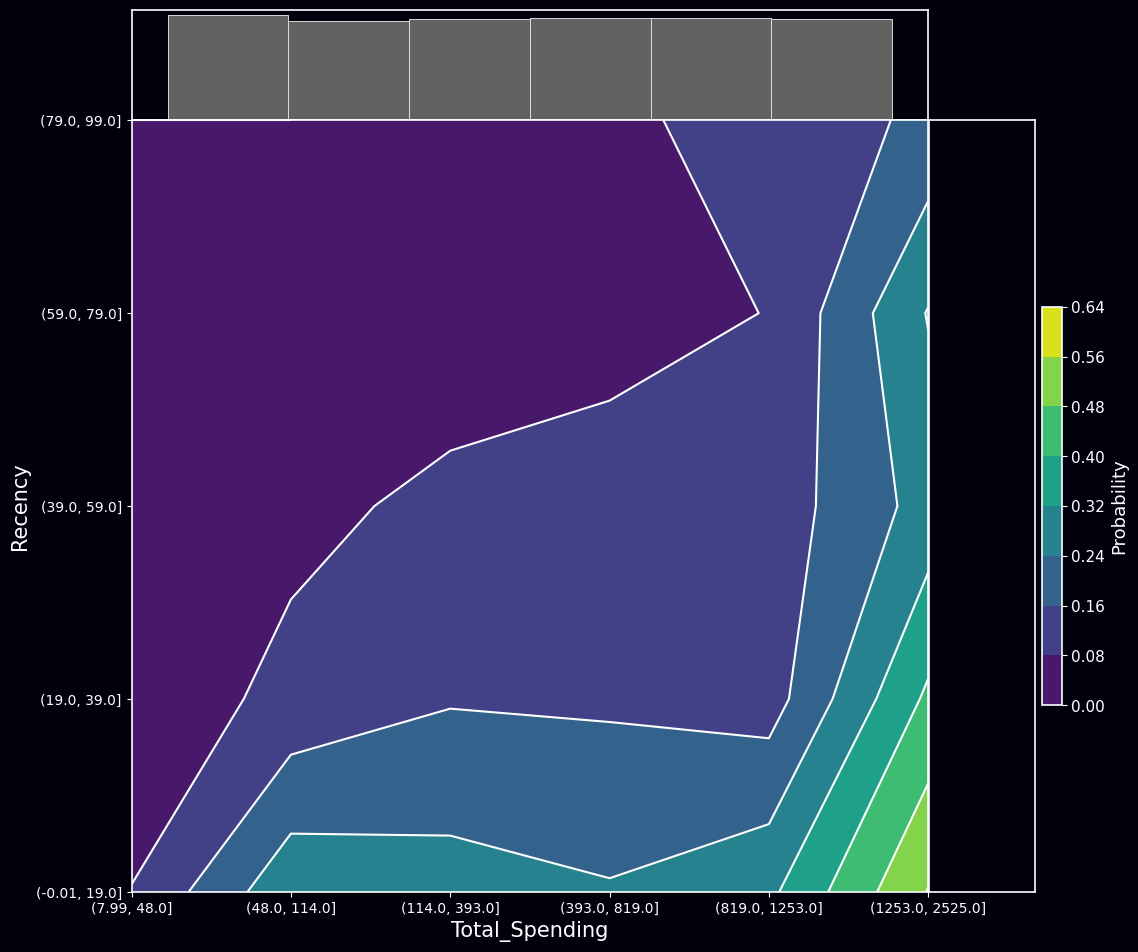

In [26]:
plot_prob_contour_map(df.Total_Spending, df.Recency, df.Response, use_quartiles=True, x_intervals=6, y_intervals=5, xlabel='Total_Spending', ylabel='Recency')


Insights on Total Spending & Recency:

- Customers who have made a purchase most recently (0-19 days) and are also high spenders ($1253-$2525) exhibit the highest response rate, at an impressive 56%. This pattern underscores that our recent high-spenders are the most engaged, signaling that more frequent, personalized campaigns could yield considerable benefits with this group.
- This trend extends to customers with a slightly longer purchase gap (19-39 days). High-spending customers in this group also demonstrate a significant response rate of 42%, emphasizing the importance of maintaining regular engagement even with customers whose last purchase was up to a month ago.
- Conversely, customers who have not made a purchase in a considerable while (79-99 days), irrespective of their spending category, have generally lower response rates, with the highest being only 18% among those spending between $1253-$2525.


When we delve into specific product categories, a similar pattern emerges:

- For both wine and meat products, customers with a recent purchase (0-19 days) and high spending stand out with the highest response rates (53% for wine and 52% for meat products). Additionally, customers with a purchase history extending to 19-39 days also maintain a substantial response rate, with 35% for wine and 32% for meat products.
- In stark contrast, customers who have not purchased recently (79-99 days) exhibit lower response rates across all spending levels in both product categories.

The data from this analysis underscores that customer engagement tends to wane as the time since their last purchase increases. Therefore, keeping regular interactions with customers, particularly those in the higher spending brackets, is crucial to maintaining their engagement and responsiveness to campaigns. 

For customers who have been away for longer, retargeting campaigns, possibly offering special discounts or showcasing new products, could help reignite their interest. Lower spenders in this group might be encouraged to engage more through personalized, value-oriented campaigns that resonate with their shopping habits and preferences.



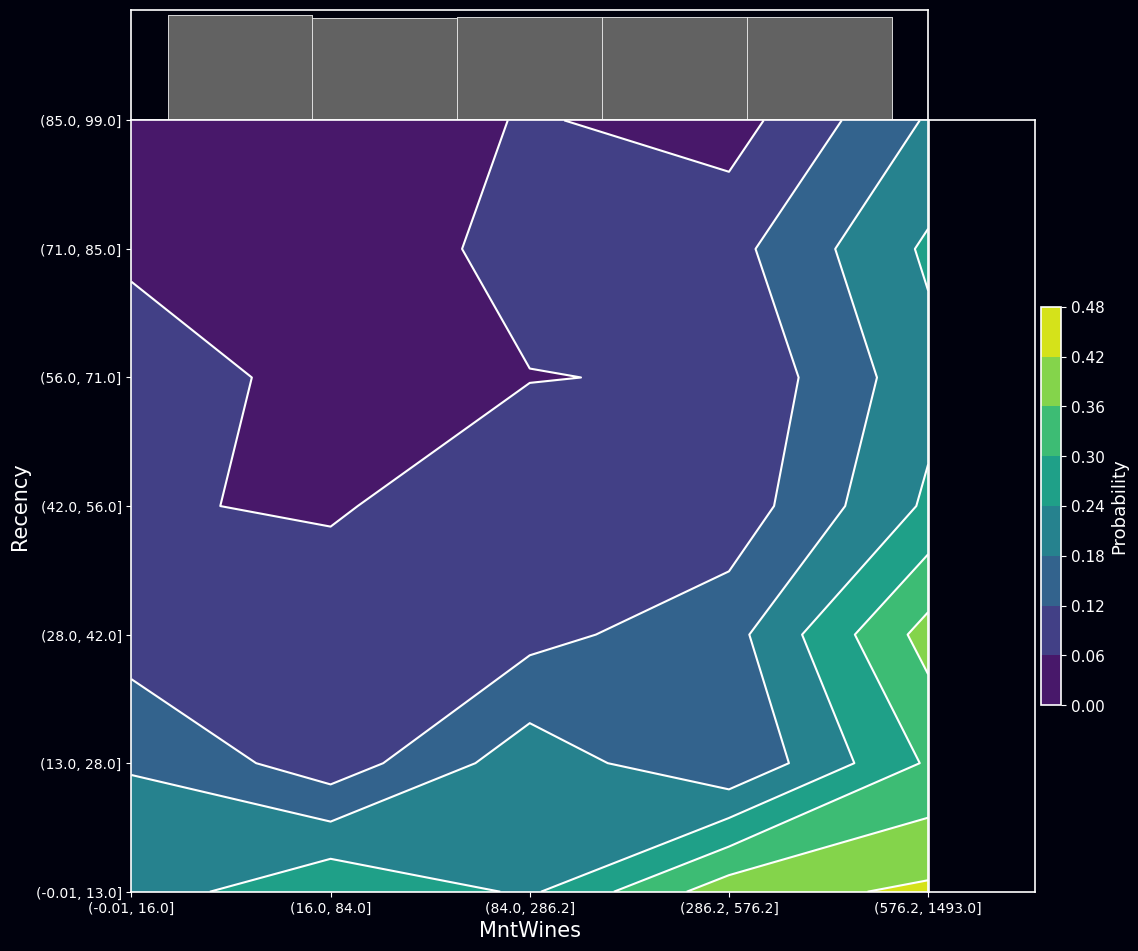

In [27]:
plot_prob_contour_map(df.MntWines, df.Recency, df.Response, use_quartiles=True, x_intervals=5, y_intervals=7, xlabel='MntWines', ylabel='Recency')

In the next section, we will continue to delve into customer behaviors and their impact on campaign responsiveness.

## 4.4. <a id='toc_4_4'></a>[Utilizing Insignificant Variables for Deeper Insights](#toc_4_4)

### 4.4.1. <a id='toc1_4_4_1_'></a>[NumWebVisitsMonth Analysis](#toc_4_4_1)


NumWebVisitsMonth represents the number of times a customer visits the company's website within a month. To understand its influence on customer responses, a logistic regression was built. Let's first look at the model's reliability before delving into the insights:

In [63]:
%%R -i df

library(broom)
r_df <- df

logit_model <- glm(Response ~ Total_Spending * NumWebVisitsMonth, data = r_df, family = binomial)
logit_model |> tidy()

# A tibble: 4 x 5
  term                              estimate std.error statistic  p.value
  <chr>                                <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)                      -6.07     0.431        -14.1  4.01e-45
2 Total_Spending                    0.00316  0.000295      10.7  8.30e-27
3 NumWebVisitsMonth                 0.538    0.0606         8.88 6.69e-19
4 Total_Spending:NumWebVisitsMonth -0.000299 0.0000478     -6.25 4.00e-10


In [30]:
%%R
library(performance)
logit_model |> model_performance()

# Indices of model performance

AIC      |     AICc |      BIC | Tjur's R2 |  RMSE | Sigma | Log_loss | Score_log | Score_spherical |   PCP
-----------------------------------------------------------------------------------------------------------
1621.435 | 1621.453 | 1644.211 |     0.113 | 0.335 | 1.000 |    0.368 |   -55.766 |           0.003 | 0.776


With an AIC of 1621.435 and a relatively high PCP of 0.776, the model exhibits a decent fit. While the Tjur's R2 is at 0.113 indicating a moderate goodness of fit, the other metrics collectively suggest that the findings based on this model can be considered reliable for drawing insights.


Customer Engagement:

- Positive Sign: An increased number of visits implies customers are engaging with the website regularly. This could be due to various reasons – compelling content, interest in products, or even habitual browsing.

- Caveat: It’s essential to differentiate between valuable engagement and potential dissatisfaction. If a user visits frequently but doesn’t respond positively, they might be facing issues with site functionality or content clarity.

Interaction with Total Spending:

The relationship between the number of web visits and total spending is nuanced. As customers visit more, there's a diminishing effect of spending on the likelihood of them responding. This can be due to:

- Window Shopping: Browsing without intent to purchase.

- Searching for Deals: Awaiting discounts or product restocks.

- User Experience: The site might be less intuitive for frequent visitors.

**Johnson-Neyman Interval Analysis** :


The plot bewlow showcases the conditional effect of total spending on response, based on the number of web visits. Notably, total spending's impact becomes especially pronounced when NumWebVisitsMonth is outside the 9.18 to 13.03 range. Given the maximum observed value for web visits in the dataset is 10, this interval is largely hypothetical but offers intriguing possibilities for customer behavior.

JOHNSON-NEYMAN INTERVAL 

When NumWebVisitsMonth is OUTSIDE the interval [9.18, 13.03], the slope of
Total_Spending is p < .05.

Note: The range of observed values of NumWebVisitsMonth is [0.00, 10.00]



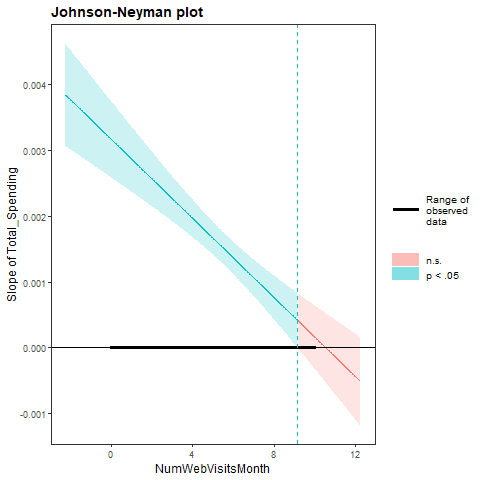

In [34]:
%%R 
library(interactions)
johnson_neyman(model = logit_model , pred = Total_Spending, modx = NumWebVisitsMonth)

---

# 5. <a id='toc_5'></a>[Customer Segmentation and Value Analysis](#toc_5)

## 5.1. <a id='toc5_1'></a>[RFM Analysis](#toc_5_1)

In [135]:
df['Recency_Score'] = pd.qcut(df['Recency'].rank(method='first'), 5, labels=[5,4,3,2,1]).astype(int)
df['Frequency_Score'] = pd.qcut(df['Total_Purchases'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
df['Monetary_Score'] = pd.qcut(df['Total_Spending'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
df['Avg_RFM'] = (df['Recency_Score'] + df['Frequency_Score'] + df['Monetary_Score'])/3

df[['Recency', 'Recency_Score', 'Total_Purchases', 'Frequency_Score', 'Total_Spending', 'Monetary_Score', 'Avg_RFM']].head()

Recency  Recency_Score  Total_Purchases  Frequency_Score  Total_Spending  \
0       58              3               25                5            1617   
1       38              4                6                1              27   
2       26              4               21                4             776   
3       26              4                8                2              53   
4       94              1               19                4             422   

   Monetary_Score  Avg_RFM  
0               5     4.33  
1               1     2.00  
2               4     4.00  
3               1     2.33  
4               3     2.67

In [136]:
# List of numerical columns
numerical_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Purchases', 
                  'Customer_Tenure', 'Total_Spending']

# Initialize an empty dictionary to hold column names, their correlation with 'Response' and p-value
correlation_dict = {}

# Loop through the numerical columns and compute Point Biserial Correlation
for col in numerical_cols:
    correlation, p_value = pointbiserialr(df['Avg_RFM'], df[col])
    correlation_dict[col] = {'Correlation': correlation, 'P_value': p_value}

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(correlation_dict).T.reset_index().rename(columns={'index':'Variable'})

correlation_df.sort_values('Correlation', ascending=False).style.\
    background_gradient(subset=['Correlation'], cmap='gist_heat').\
        set_caption('Point-Biserial Correlation')

In [141]:
categorical_cols = ['Education', 'Marital_Status', 'Generation',  'AcceptedAnyCmp',
                    'Complain', 'Living_With', 'Is_Parent', 'Response']

chi2_and_cramers_v(df, target='Avg_RFM', variables=categorical_cols)

Variable  Chi-square statistic    P-value  Cramers_V
6       Is_Parent                257.45   3.82e-48       0.33
3  AcceptedAnyCmp                204.89   3.18e-37       0.30
5     Living_With                595.61  1.57e-102       0.29
7        Response                175.61   3.40e-31       0.27
0       Education                124.20   1.13e-08       0.09
2      Generation                 90.83   1.24e-06       0.09
1  Marital_Status                104.42   6.50e-02       0.04
4        Complain                 12.63   3.96e-01       0.02

Below, is how customer persona segments can be made based on RFM scores

| Segment | Definition |
|----------|------------------------|
| **Champions** | Bought recently, buy often and spend the most|
| **New** | Bought most recently, but not often.|
| **Promising** | Recent shoppers, but haven’t spent much.|
| **At Risk** | Purchased often but a long time ago. Need to bring them back!|
| **Can’t Lose Them** | Made biggest purchases, and often. But haven’t returned for a long time.|
| **Lost** | Lowest recency, frequency and monetary scores.|




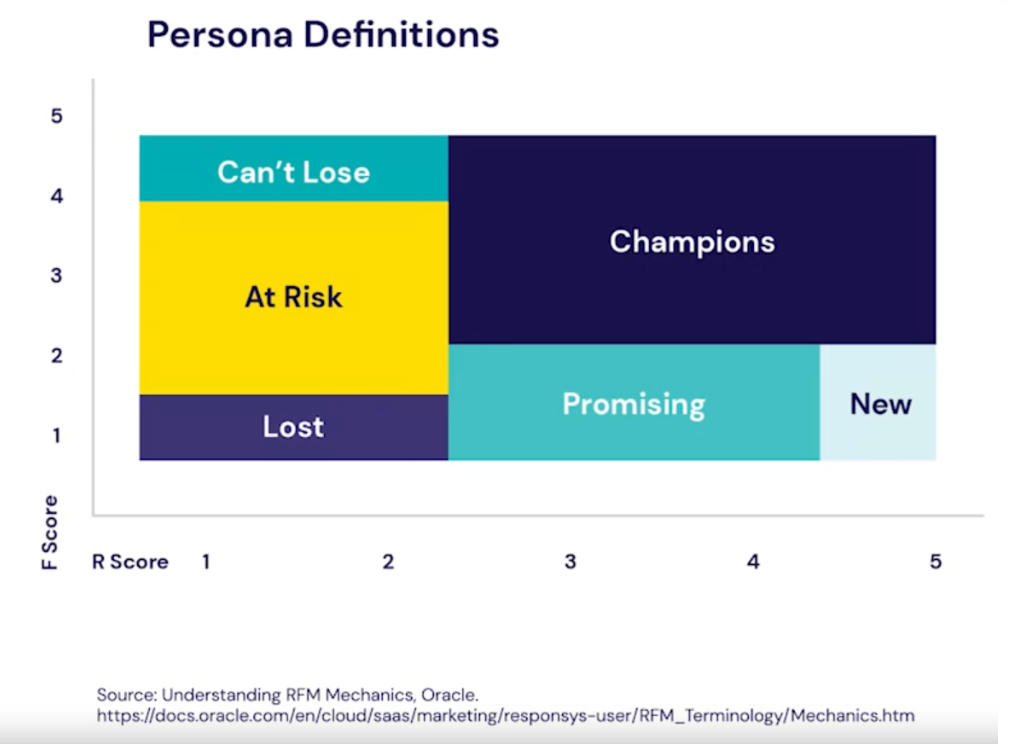

It's important to understand that the segment definitions provided earlier are conceptual in nature. Instead of relying solely on these predefined categories, we will harness algorithmic techniques to uncover the inherent segments within our dataset. To achieve this, we'll first employ dimensionality reduction, followed by clustering methods to discern the natural clusters present in the data. Throughout this process, we'll be comparing the efficacy of various dimensionality reduction and clustering methodologies.


## 5.2. <a id='toc5_2'></a>[Dimensionality Reduction](#toc_5_2)

In [31]:
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

In [167]:
def visualize_embeddings(X_pca, X_tsne, X_umap, feature_set_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    axes[0].set_title("PCA")

    axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
    axes[1].set_title("t-SNE")

    axes[2].scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
    axes[2].set_title("UMAP")

    plt.suptitle(feature_set_name, fontsize=16, y=1.01)  

    plt.tight_layout()
    plt.show()

In [172]:
feature_sets = {
    "Demographics": {
        'cat_cols': ['Education', 'Marital_Status', 'Living_With'],
        'num_cols': ['Age', 'Income', 'Kidhome', 'Teenhome']
    },
    "Spending": {
        'cat_cols': [],
        'num_cols': ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending', 'Recency',
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    },
    "Spending & CampaignResponse": {
        'cat_cols': ['AcceptedAnyCmp'],
        'num_cols': ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    },
    "Demographics & CampaignResponses": {
        'cat_cols': ['Education', 'Marital_Status', 'Living_With', 'AcceptedAnyCmp'],
        'num_cols': ['Age', 'Income', 'Kidhome', 'Teenhome']
    },
    "CampaignResponses & Spending": {
        'cat_cols': ['AcceptedAnyCmp'],
        'num_cols': ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending', 'Recency', 
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    },
    "RFM & Demographics": {
        'cat_cols': ['Education', 'Living_With', 'Marital_Status', 'Is_Parent'],
        'num_cols': ['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Avg_RFM',
                    'Age', 'Income', 'Kidhome', 'Teenhome']
    }
}

Visualizing clusters for Demographics


Visualizing clusters for Spending


Visualizing clusters for Spending & CampaignResponse


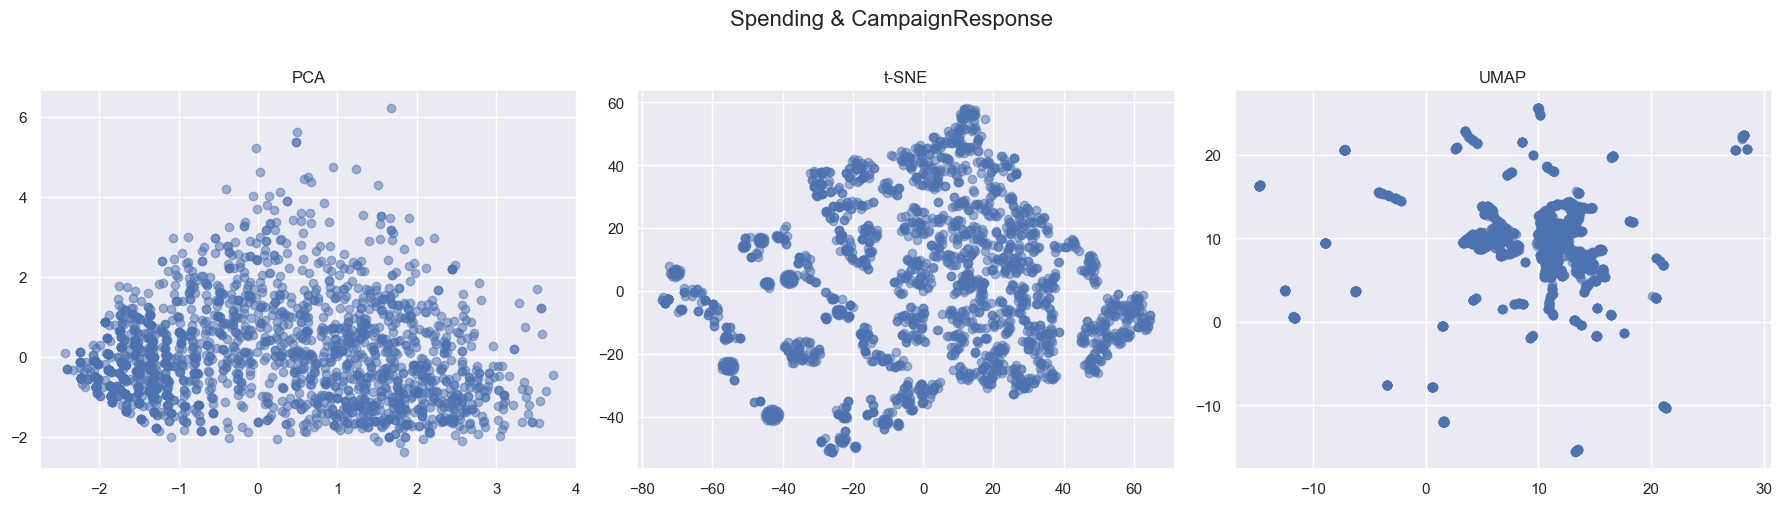

Visualizing clusters for Demographics & CampaignResponses


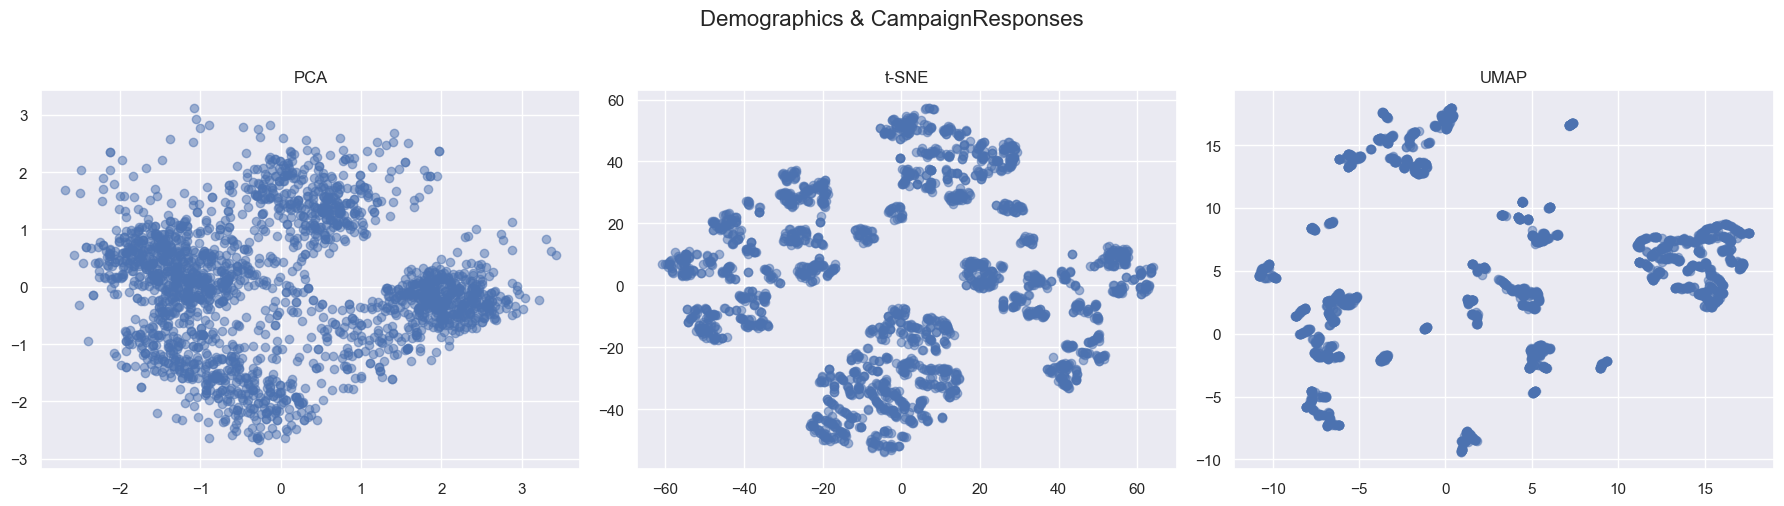

Visualizing clusters for CampaignResponses & Spending


Visualizing clusters for RFM & Demographics


In [173]:
for name, features in feature_sets.items():
    cat_cols = features['cat_cols']
    num_cols = features['num_cols']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(drop='first'), cat_cols)])

    # Select features
    X = df[cat_cols + num_cols]

    # Apply transformations
    X_processed = preprocessor.fit_transform(X)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_processed)

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)  
    X_tsne = tsne.fit_transform(X_processed)

    # UMAP
    reducer = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)  
    X_umap = reducer.fit_transform(X_processed)

    print(f"Visualizing clusters for {name}")
    visualize_embeddings(X_pca, X_tsne, X_umap, name)

In [197]:
feature_sets2 = {
    "Demographics & Spending": {
        'cat_cols': ['Education', 'Marital_Status', 'Living_With', 'Is_Parent', 'NumWebVisitsMonth_Grp', 'NumStorePurchases_Grp', 'NumDealsPurchases_Grp'],
        'num_cols': ['Age', 'Income', 'Kidhome', 'Customer_Tenure', 'Teenhome',
                    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    },
    "Demographics, Spending & CampaignResponse": {
        'cat_cols': ['AcceptedAnyCmp', 'Education', 'Marital_Status', 'Living_With', 'Is_Parent', 'NumWebVisitsMonth_Grp', 'NumStorePurchases_Grp', 'NumDealsPurchases_Grp'],
        'num_cols': ['NumWebPurchases', 'NumCatalogPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'Age', 'Income', 'Kidhome', 'Customer_Tenure', 'Teenhome']
    },
    "Demographics, CampaignResponse  & RFM": {
        'cat_cols': ['Education', 'Living_With', 'Marital_Status', 'Is_Parent', 'AcceptedAnyCmp'],
        'num_cols': ['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Avg_RFM',
                    'Age', 'Income', 'Kidhome', 'Customer_Tenure', 'Teenhome']
    },
    "Demographics, Spending, CampaignResponse & RFM": {
        'cat_cols': ['AcceptedAnyCmp', 'Education', 'Marital_Status', 'Living_With', 'Is_Parent', 'NumWebVisitsMonth_Grp', 'NumStorePurchases_Grp', 'NumDealsPurchases_Grp'],
        'num_cols': ['NumWebPurchases', 'NumCatalogPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                    'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Avg_RFM', 'Customer_Tenure']
    } 
}

Visualizing clusters for Demographics & Spending


Visualizing clusters for Demographics, Spending & CampaignResponse


Visualizing clusters for Demographics, CampaignResponse  & RFM


Visualizing clusters for Demographics, Spending, CampaignResponse & RFM


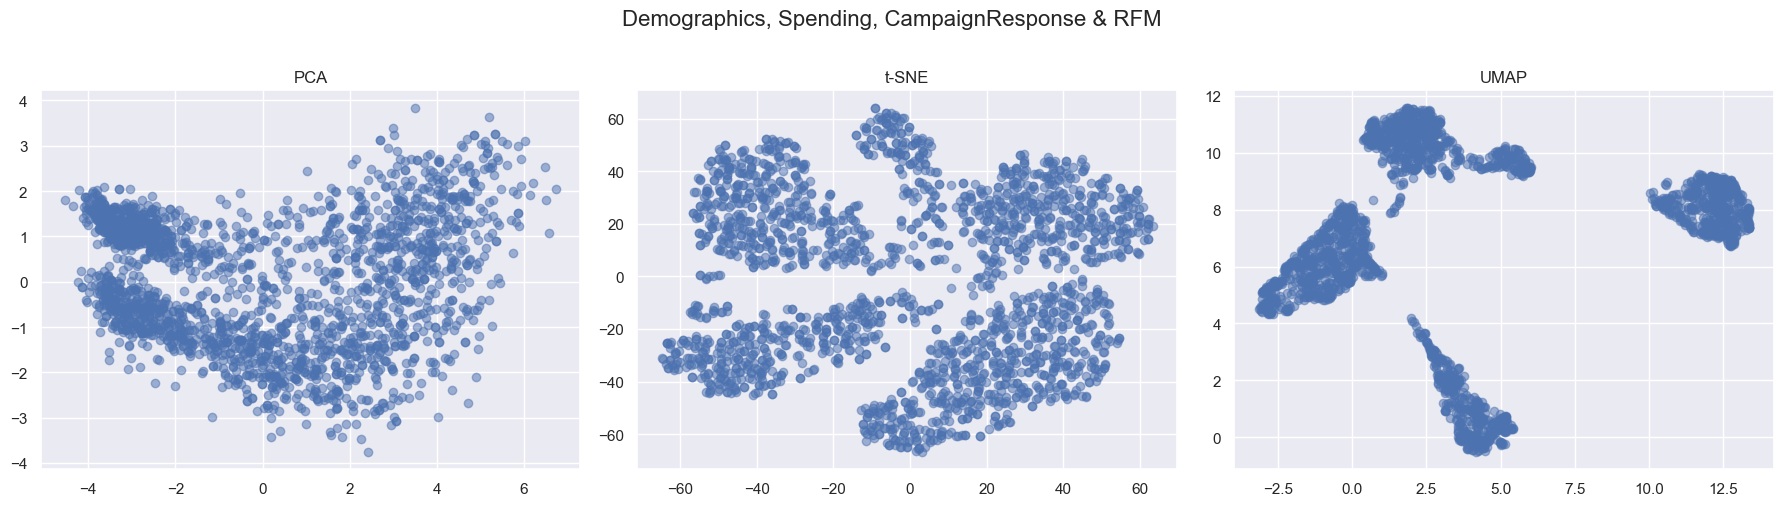

In [228]:
for name, features in feature_sets2.items():
    cat_cols = features['cat_cols']
    num_cols = features['num_cols']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(drop='first'), cat_cols)])

    # Select features
    X = df[cat_cols + num_cols]

    # Apply transformations
    X_processed = preprocessor.fit_transform(X)

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_processed)

    # t-SNE
    tsne = TSNE(n_components=2, perplexity=20)  
    X_tsne = tsne.fit_transform(X_processed)

    # UMAP
    reducer = umap.UMAP(n_neighbors=20, n_components=2)  
    X_umap = reducer.fit_transform(X_processed)

    print(f"Visualizing clusters for {name}")
    visualize_embeddings(X_pca, X_tsne, X_umap, name)

In [243]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

cat_cols= ['Education', 'Living_With', 'Marital_Status', 'Is_Parent', 'AcceptedAnyCmp']
num_cols= ['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Avg_RFM','Age', 'Income', 'Kidhome', 'Customer_Tenure', 'Teenhome']

# Create a transformer for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)])

# Select features
X = df[cat_cols + num_cols]

# Apply transformations
X_processed = preprocessor.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)  
X_tsne = tsne.fit_transform(X_processed)

# UMAP
reducer = umap.UMAP(n_neighbors=20, n_components=2, random_state=42)  
X_umap = reducer.fit_transform(X_processed)

# List of embeddings
embeddings = [('PCA', X_pca), ('t-SNE', X_tsne), ('UMAP', X_umap)]

# Range of potential clusters
range_n_clusters = list(range(2, 11))

# Set up plotting
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

for idx, (name, X_emb) in enumerate(embeddings):
    sil_scores, db_scores, ch_scores = [], [], []  # Reset scores for each embedding

    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X_emb)

        # Compute the scores
        sil_scores.append(silhouette_score(X_emb, cluster_labels))
        db_scores.append(davies_bouldin_score(X_emb, cluster_labels))
        ch_scores.append(calinski_harabasz_score(X_emb, cluster_labels))

    # Plotting scores and annotate for each metric and embedding
    for metric_idx, (scores, label) in enumerate([(sil_scores, 'Silhouette Score'),
                                                  (db_scores, 'Davies-Bouldin Index'),
                                                  (ch_scores, 'Calinski-Harabasz Index')]):
        ax = axes[metric_idx, idx]
        ax.plot(range_n_clusters, scores, marker='o', linestyle='-')
        ax.set_title(f'{label} vs. Number of Clusters ({name})')
        ax.set_xlabel('Number of Clusters')
        
        if label == 'Davies-Bouldin Index':
            best_score_idx = np.argmin(scores)
        else:
            best_score_idx = np.argmax(scores)
        
        ax.annotate(f'{scores[best_score_idx]:.2f}', 
                    (range_n_clusters[best_score_idx], scores[best_score_idx]),
                    textcoords="offset points", 
                    xytext=(-5,-12), 
                    ha='center',
                    weight='bold',
                    color='darkred')

        ax.grid(False)

axes[0, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[2, 0].set_ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

In [230]:
# Define algorithms to compare
algorithms = {
    'KMeans': KMeans(n_clusters=4, init='k-means++'),  
    'GMM': GaussianMixture(n_components=4),  
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean'),
    'Spectral': SpectralClustering(n_clusters=4, n_neighbors=10, affinity='laplacian', gamma=1.5, assign_labels='discretize', degree=2),
    'MeanShift': MeanShift()
}

results = {}

# Cluster and evaluate
for name, algo in algorithms.items():
    labels = algo.fit_predict(X_umap)
    
    # Ensure that the algorithm has found more than one cluster to compute silhouette score
    if len(set(labels)) > 1:
        score = silhouette_score(X_umap, labels)
        results[name] = score
    else:
        results[name] = 'N/A - Only 1 cluster'

# Print results
for name, score in results.items():
    print(f"{name}: {score}")


KMeans: 0.8793151378631592
GMM: 0.8793151378631592
DBSCAN: 0.8793151378631592
Agglomerative: 0.8793151378631592
Spectral: 0.8793151378631592
MeanShift: 0.5342873334884644


In [226]:
for name, algo in algorithms.items():
    labels = algo.fit_predict(X_umap)
    print(f"First 20 labels for {name}: {labels[:20]}")


First 20 labels for KMeans: [1 0 1 3 3 2 2 3 3 3 1 1 0 1 1 0 1 2 3 1]
First 20 labels for GMM: [2 3 2 0 0 1 1 0 0 0 2 2 3 2 2 3 2 1 0 2]
First 20 labels for DBSCAN: [0 1 0 2 2 3 3 2 2 2 0 0 1 0 0 1 0 3 2 0]
First 20 labels for Agglomerative: [0 3 0 2 2 1 1 2 2 2 0 0 3 0 0 3 0 1 2 0]
First 20 labels for Spectral: [2 1 2 0 0 3 3 0 0 0 2 2 1 2 2 1 2 3 0 2]
First 20 labels for MeanShift: [1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1]


In [231]:
# Number of clusters for KMeans, Agglomerative, and Spectral
n_clusters = 4  # You determined this value earlier

# KMeans
kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
kmeans_labels = kmeans.fit_predict(X_umap)

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', metric='euclidean')
agglo_labels = agglo.fit_predict(X_umap)

# Spectral
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=1.5, assign_labels='discretize')
agglo_labels = spectral.fit_predict(X_umap)

# MeanShift
meanshift = MeanShift()  
gmm_labels = meanshift.fit_predict(X_umap)

# GMM
gmm = GaussianMixture(n_components=n_clusters)
gmm_labels = gmm.fit_predict(X_umap)



# Setting up the figure and axes
fig, axs = plt.subplots(3, 3, figsize=(20, 18))

# For kmeans_labels

# PCA Plot
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow', edgecolor='k')
axs[0, 0].set_title('PCA reduced data (KMeans)')

# t-SNE Plot
axs[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='rainbow', edgecolor='k')
axs[0, 1].set_title('t-SNE reduced data (KMeans)')

# UMAP Plot
axs[0, 2].scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, cmap='rainbow', edgecolor='k')
axs[0, 2].set_title('UMAP reduced data (KMeans)')

# For agglo_labels

# PCA Plot
axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='rainbow', edgecolor='k')
axs[1, 0].set_title('PCA reduced data (Agglomerative)')

# t-SNE Plot
axs[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=agglo_labels, cmap='rainbow', edgecolor='k')
axs[1, 1].set_title('t-SNE reduced data (Agglomerative)')

# UMAP Plot
axs[1, 2].scatter(X_umap[:, 0], X_umap[:, 1], c=agglo_labels, cmap='rainbow', edgecolor='k')
axs[1, 2].set_title('UMAP reduced data (Agglomerative)')

# For gmm_labels

# PCA Plot
axs[2, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='rainbow', edgecolor='k')
axs[2, 0].set_title('PCA reduced data (GMM)')

# t-SNE Plot
axs[2, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='rainbow', edgecolor='k')
axs[2, 1].set_title('t-SNE reduced data (GMM)')

# UMAP Plot
axs[2, 2].scatter(X_umap[:, 0], X_umap[:, 1], c=gmm_labels, cmap='rainbow', edgecolor='k')
axs[2, 2].set_title('UMAP reduced data (GMM)')

plt.tight_layout()
plt.show()


---

---

## 1.7. <a id='toc1_7_'></a>[Future Works](#toc0_)

#### 1.7.1.1. <a id='toc1_7_1_1_'></a>[Campaign Acceptance (AcceptedCmp1-4): How customer responses to different campaigns correlate with campaign succes](#toc0_)

#### 1.7.1.2. <a id='toc1_7_1_2_'></a>[Interaction with the Company (NumCatalogPurchases, Customer_Tenure): How a customer's history with the company influences their response to campaigns.](#toc0_)

### 1.7.2. <a id='toc1_7_2_'></a>[Feature Selection](#toc0_)